# Testing the simulation

In [19]:
import pynbody
import matplotlib.pyplot as plt

s = pynbody.load('h148.cosmo50PLK.3072g3HbwK1BH/h148.cosmo50PLK.3072g3HbwK1BH.004096/h148.cosmo50PLK.3072g3HbwK1BH.004096')

In [20]:
h = s.halos()

In [21]:
print(len(h))

13299


In [22]:
h[5].properties

{'omegaM0': 0.3086,
 'omegaL0': 0.6914,
 'h': 0.6776942783267969,
 'boxsize': Unit("5.00e+04 kpc a"),
 'a': 0.9999999999470058,
 'time': Unit("1.41e+01 s kpc km**-1"),
 'halo_id': 5}

In [17]:
h[5].properties

nparticles: 878951
nstar: 85655
ngas: 41513
ndark: 751783
33280094068.215164
['HII', 'HeIII', 'ne', 'hetot', 'hydrogen', 'feh', 'oxh', 'ofe', 'mgfe', 'nefe', 'sife', 'c_s', 'c_s_turb', 'mjeans', 'mjeans_turb', 'ljeans', 'ljeans_turb', 'smooth', 'rho', 'r', 'rxy', 'vr', 'v2', 'vt', 'ke', 'te', 'j', 'j2', 'jz', 'vrxy', 'vcxy', 'vphi', 'vtheta', 'v_mean', 'v_disp', 'age', 'u_mag', 'u_lum_den', 'b_mag', 'b_lum_den', 'v_mag', 'v_lum_den', 'r_mag', 'r_lum_den', 'i_mag', 'i_lum_den', 'j_mag', 'j_lum_den', 'h_mag', 'h_lum_den', 'k_mag', 'k_lum_den', 'U_mag', 'U_lum_den', 'B_mag', 'B_lum_den', 'V_mag', 'V_lum_den', 'R_mag', 'R_lum_den', 'I_mag', 'I_lum_den', 'J_mag', 'J_lum_den', 'H_mag', 'H_lum_den', 'K_mag', 'K_lum_den', 'theta', 'alt', 'az', 'cs', 'mu', 'p', 'u', 'temp', 'zeldovich_offset', 'aform', 'tform']


In [16]:
for i in range(5,20):
    halo = h.load_copy(i)
    if not len(halo)==0:
        print(halo['mass'].sum().in_units('Msol'))
    del halo

33280094068.215137
30584764500.363266
16141349600.183556
12393907720.528013
10574577743.790892
9287775420.63585
8582573990.878432
6426013829.69464


0


In [6]:
pynbody.analysis.angmom.faceon(halo)

In [14]:
print(min(halo.star['mass'].in_units('Msol')))
plt.figure()
pynbody.plot.stars.satlf(halo,band='v')
plt.show()

4910.196856236124


KeyError: 'children'

<Figure size 432x288 with 0 Axes>

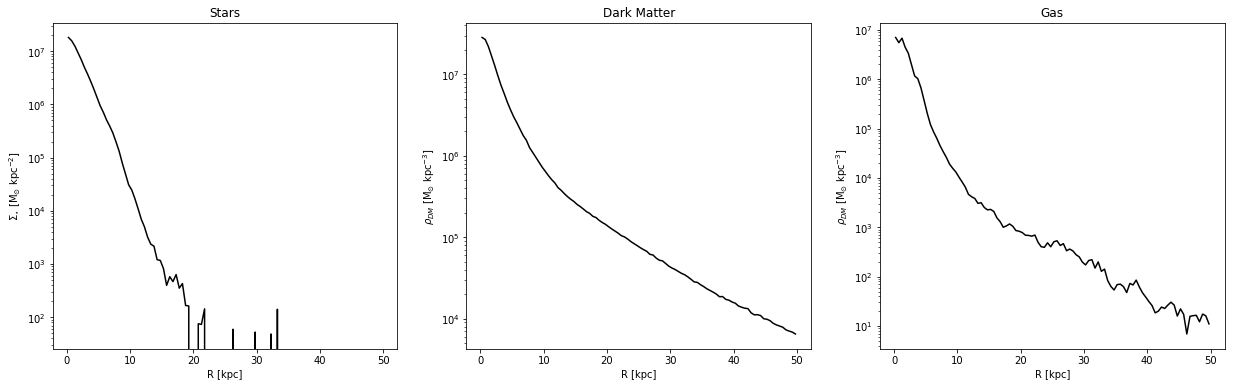

In [9]:

# make the figure and sub plots
f, axs = plt.subplots(1,3,figsize=(21,6))

p = pynbody.analysis.profile.Profile(halo.s,min=0.01,max=50)
# make the plot
axs[0].plot(p['rbins'],p['density'], 'k')
axs[0].semilogy()
axs[0].set_xlabel('R [kpc]')
axs[0].set_ylabel(r'$\Sigma_{\star}$ [M$_{\odot}$ kpc$^{-2}$]')
axs[0].title.set_text("Stars")

# make a 3D density plot of the dark matter (note ndim=3 in the constructor below)
p = pynbody.analysis.profile.Profile(halo.d,min=.01,max=50,ndim=3)

axs[1].plot(p['rbins'],p['density'], 'k')
axs[1].semilogy()
axs[1].set_xlabel('R [kpc]')
axs[1].set_ylabel(r'$\rho_{DM}$ [M$_{\odot}$ kpc$^{-3}$]')
axs[1].title.set_text("Dark Matter")

# make a 3D density plot of the gas (note ndim=3 in the constructor below)
p = pynbody.analysis.profile.Profile(halo.g,min=.01,max=50,ndim=3)

axs[2].plot(p['rbins'],p['density'], 'k')
axs[2].semilogy()
axs[2].set_xlabel('R [kpc]')
axs[2].set_ylabel(r'$\rho_{DM}$ [M$_{\odot}$ kpc$^{-3}$]')
axs[2].title.set_text("Gas")

plt.savefig('density_profiles_h5_2.png',dpi=300)

plt.show()